In [13]:
import pandas as pd
from scipy.stats import skew
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [14]:
# Load original and transformed datasets
df_original = pd.read_csv("exoplanets_outlier_handled.csv")
df_transformed = pd.read_csv("exoplanets_transformed.csv")

# Define columns of interest
columns = ['planet_period_x', 'semi_major_axis_x', 'pl_bmasse', 'planet_radius_x', 'pl_insol']

# Compare skewness before and after transformation
skew_results = []
for col in columns:
    if col in df_original.columns and f"{col}_log" in df_transformed.columns:
        original_skew = skew(df_original[col].dropna())
        transformed_skew = skew(df_transformed[f"{col}_log"].dropna())
        skew_results.append((col, original_skew, transformed_skew))

# Print results
print(f"{'Column':<20} {'Original Skewness':<20} {'Transformed Skewness':<20}")
print("="*60)
for col, orig_skew, trans_skew in skew_results:
    print(f"{col:<20} {orig_skew:<20.4f} {trans_skew:<20.4f}")

Column               Original Skewness    Transformed Skewness
planet_period_x      6.7490               1.2837              
semi_major_axis_x    5.3858               1.9702              
pl_bmasse            6.2162               -2.1796             
planet_radius_x      3.2492               1.5200              
pl_insol             4.8462               -0.5637             


In [15]:
df = pd.read_csv("exoplanets_transformed.csv")

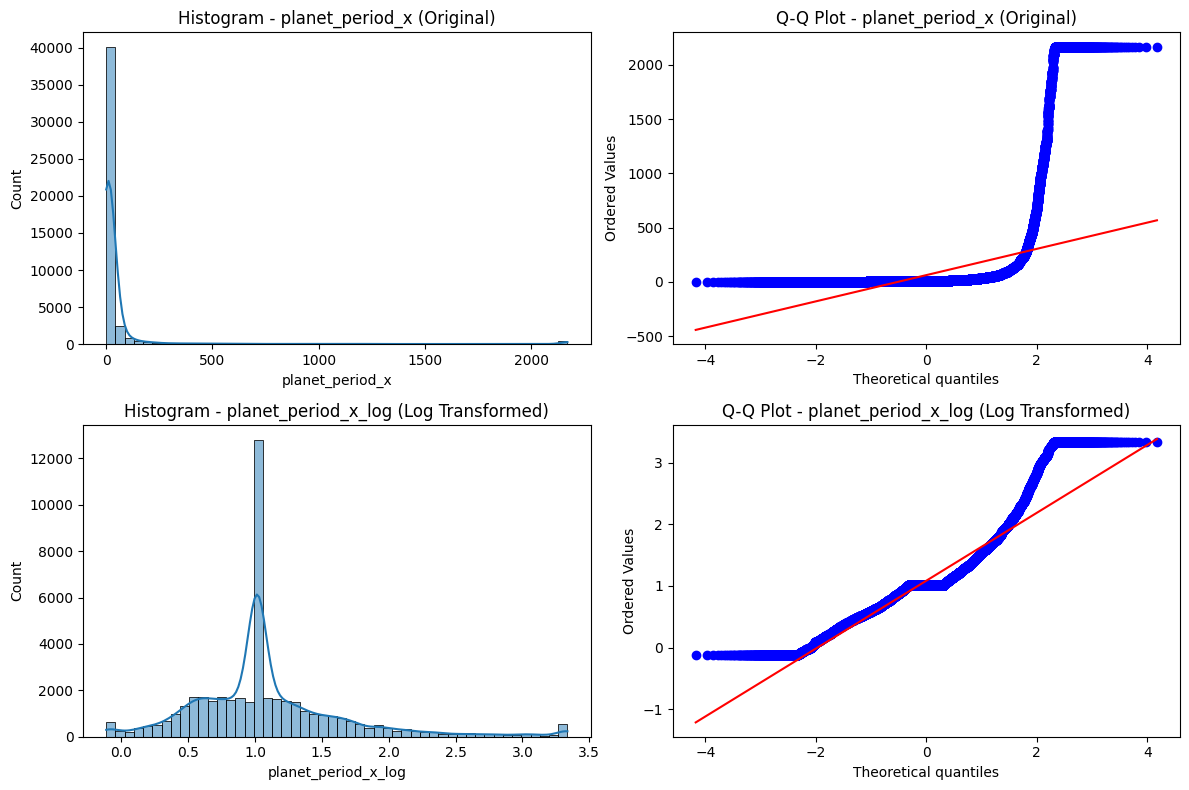

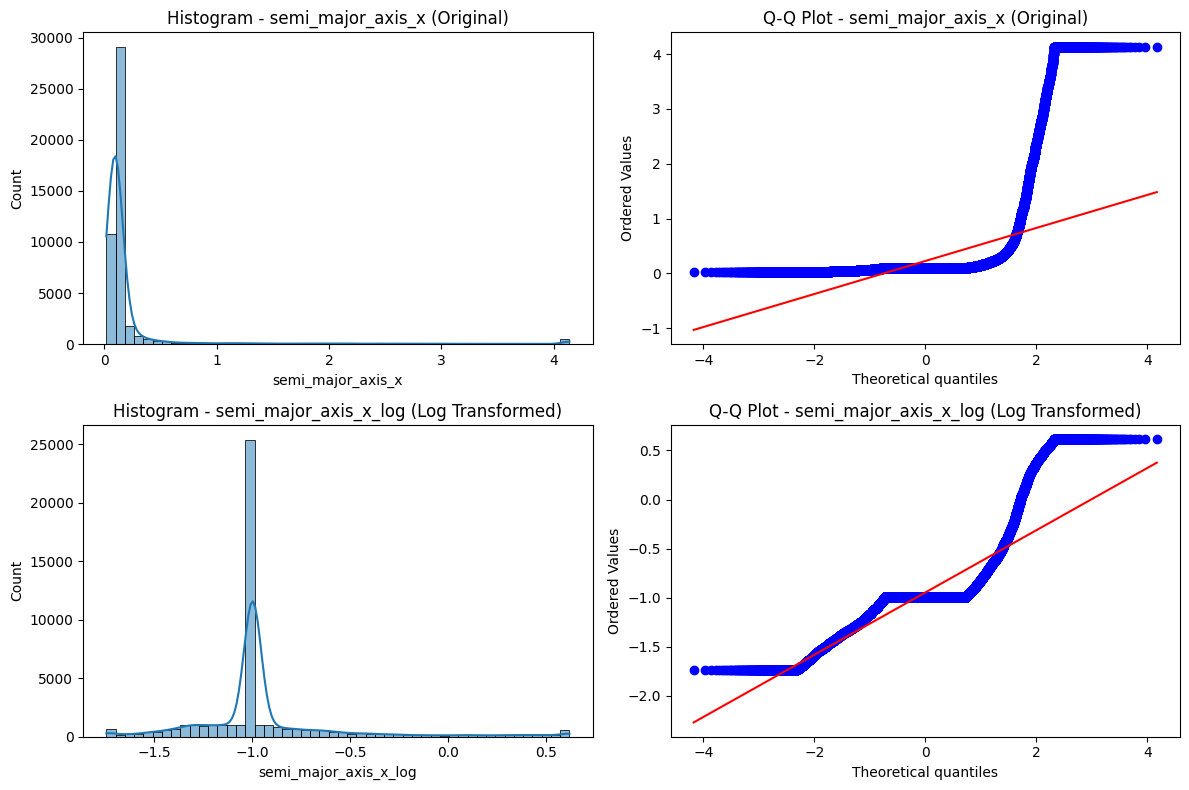

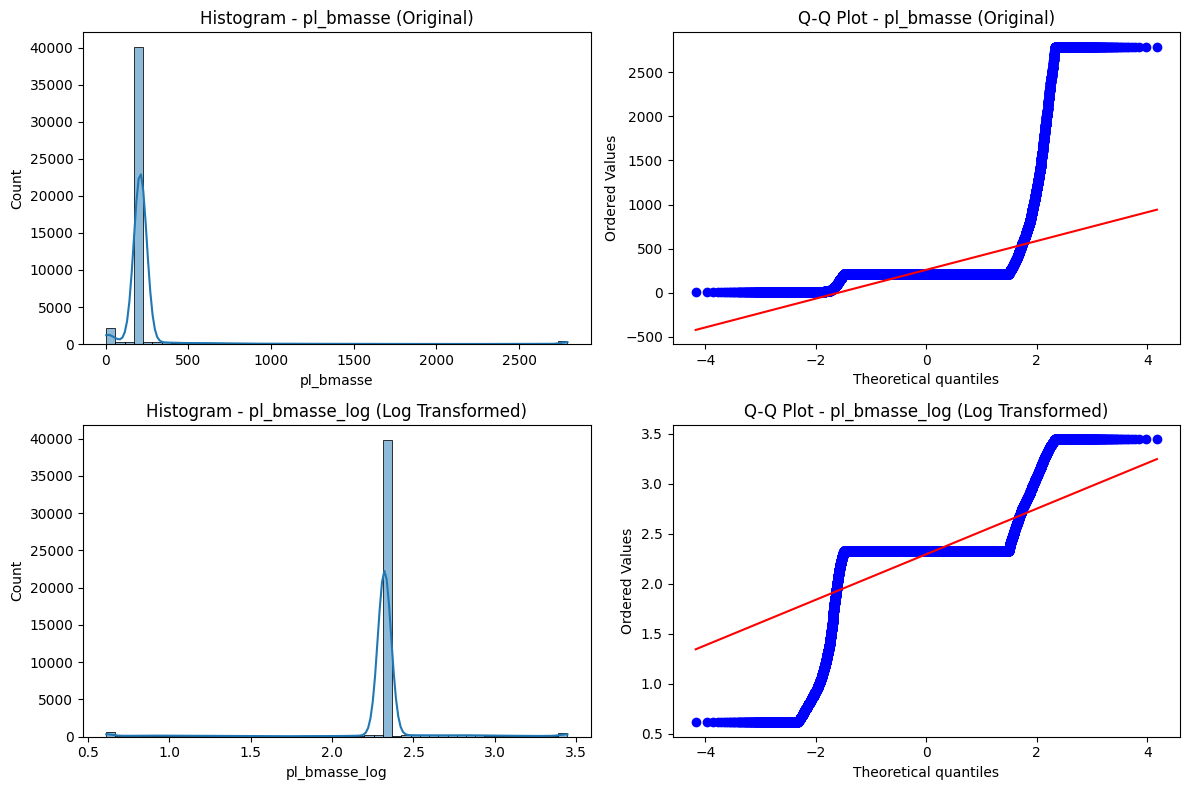

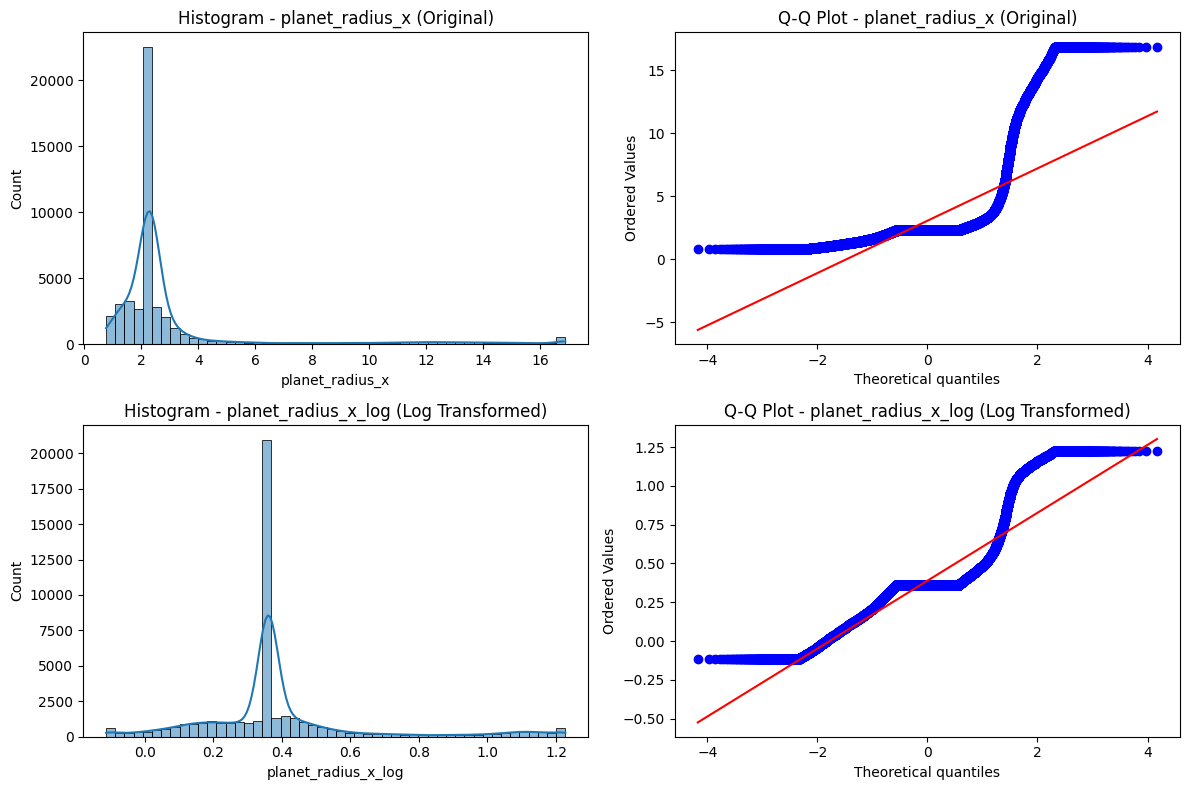

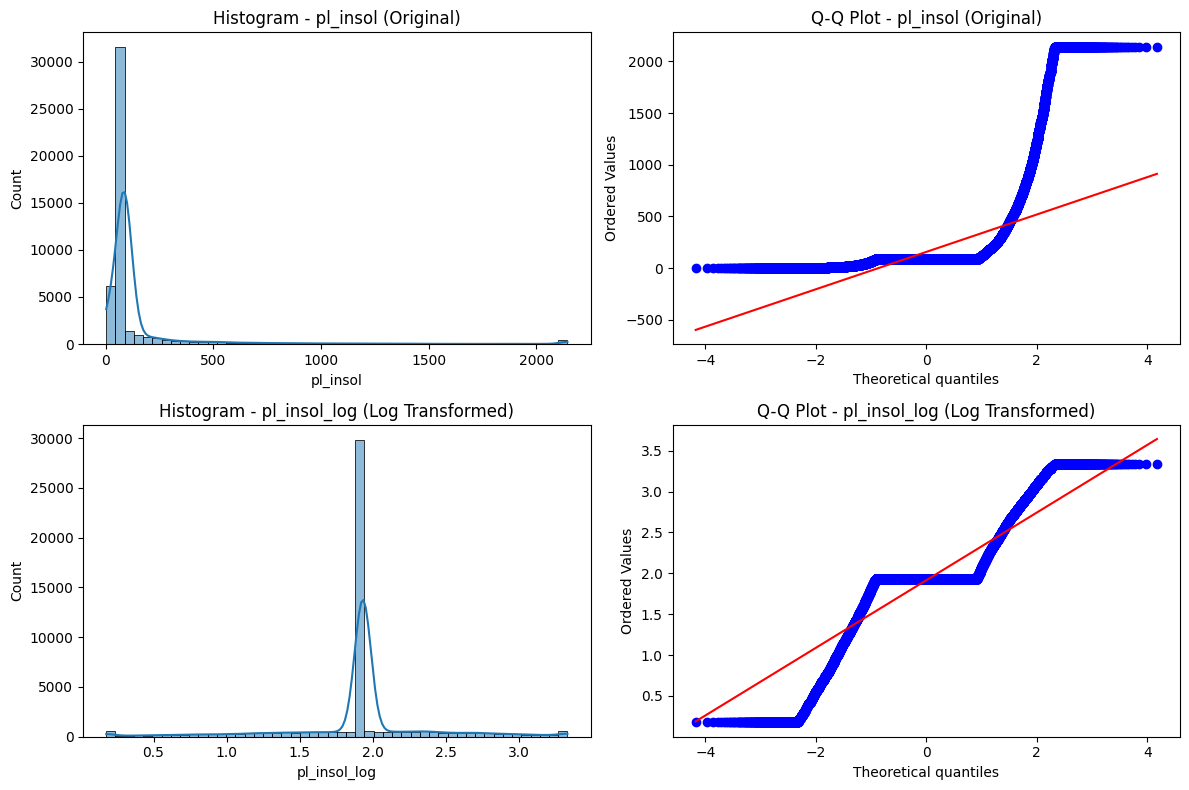

In [16]:
# Columns to analyze
original_cols = ["planet_period_x", "semi_major_axis_x", "pl_bmasse", "planet_radius_x", "pl_insol"]
log_cols = [f"{col}_log" for col in original_cols]  # Assuming transformed columns are named with "_log"

# Plot histograms and Q-Q plots
for orig, log in zip(original_cols, log_cols):
    if log in df.columns:  # Ensure transformed column exists
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        
        # Histogram of original
        sns.histplot(df[orig].dropna(), bins=50, kde=True, ax=axes[0, 0])
        axes[0, 0].set_title(f"Histogram - {orig} (Original)")
        
        # Q-Q plot of original
        stats.probplot(df[orig].dropna(), dist="norm", plot=axes[0, 1])
        axes[0, 1].set_title(f"Q-Q Plot - {orig} (Original)")
        
        # Histogram of transformed
        sns.histplot(df[log].dropna(), bins=50, kde=True, ax=axes[1, 0])
        axes[1, 0].set_title(f"Histogram - {log} (Log Transformed)")
        
        # Q-Q plot of transformed
        stats.probplot(df[log].dropna(), dist="norm", plot=axes[1, 1])
        axes[1, 1].set_title(f"Q-Q Plot - {log} (Log Transformed)")
        
        plt.tight_layout()
        plt.show()